<a href="https://colab.research.google.com/github/shikha369/BeforeYouShop/blob/main/Poco_flipkart_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

In [ ]:
poco_reviews = []
for i in range(1,30):
  poco=[]
  url="https://www.flipkart.com/poco-x3-pro-graphite-black-128-gb/product-reviews/itm736059fa07afb?pid=MOBGFKNFRJDN3DS4&lid=LSTMOBGFKNFRJDN3DS4PPS28U&marketplace=FLIPKART&page=1"+str(i)
  response = requests.get(url)
  soup = bs(response.content, "html.parser")
  reviews = soup.findAll("div", attrs={"class", ""})
  for i in range(len(reviews)):
    poco.append(reviews[i].text)
  poco_reviews = poco_reviews + poco

In [ ]:
with open("poco.txt", "w", encoding= 'utf8') as output:
  output.write(str(poco_reviews))

In [ ]:
#joining all reviews into a single para
poco_rev_string = " ".join(poco_reviews)

#removing unwanted symbols
poco_rev_string = re.sub("[^A-Za-z" "]+", " ", poco_rev_string).lower()
poco_rev_string = re.sub("[0-9" "]+", " ", poco_rev_string)

poco_rev_words = poco_rev_string.split(" ")

In [ ]:
#should remove the stop words too. let me see what happens if I don't :p

wordcloud_poco = WordCloud(
    background_color = 'black',
    width=1800,
    height=1400
).generate(poco_rev_string)

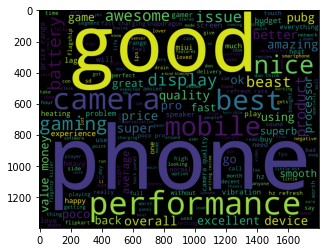

In [ ]:
plt.imshow(wordcloud_poco)

In [ ]:
##positive words cloud

with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")  
  poswords = poswords[36:]

poco_pos = " ".join ([w for w in poco_rev_words if w in poswords])
wordcloud_poco_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(poco_pos)
plt.imshow(wordcloud_poco_pos)

In [ ]:
##negative words cloud

with open("negative-words.txt","r",encoding = "ISO-8859-1") as neg:
  negwords = neg.read().split("\n")
  negwords = negwords[37:]

# negative word cloud
# Choosing the only words which are present in negwords
poco_neg = " ".join ([w for w in poco_rev_words if w in negwords])

wordcloud_poco_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(poco_neg)
plt.imshow(wordcloud_poco_neg)